In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/'My Drive'/'Category and Attribute Prediction Benchmark'

/content/drive/My Drive/Category and Attribute Prediction Benchmark


In [0]:
%ls

Anno/  Eval/  Img/  README.txt


In [0]:
%ls Anno/

list_attr_cloth.txt  list_bbox.txt            list_category_img.txt
list_attr_img.txt    list_category_cloth.txt  list_landmarks.txt


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer
import nltk

In [0]:
attr_name_to_class = pd.read_fwf('Anno/list_attr_cloth.txt', skiprows=2, header=None, widths=[29, 1], names=("name", "label"))
name_clean = attr_name_to_class.name.str.replace(r'abstract|print|printed|faux|faux-|-inspired', '').str.strip()

In [0]:
drop na, cable-knit, button-front, floral-embroidered, faux, -inspired

In [0]:
attr_name_to_class.head()

,name,label
0,a-line,3
1,abstract,1
2,abstract chevron,1
3,abstract chevron print,1
4,abstract diamond,1


In [0]:
name_clean.to_list()

In [0]:
name_clean_df = name_clean.str.split().explode().dropna().reset_index()

In [0]:
st = LancasterStemmer()
name_clean_df['name_short'] = pd.Series([st.stem(x) for x in name_clean_df.name.to_list()])

In [0]:
name_clean_df.head()

,index,name,name_short
0,0,a-line,a-line
1,2,chevron,chevron
2,3,chevron,chevron
3,4,diamond,diamond
4,5,floral,flor


In [0]:
name_clean_df = name_clean_df.join(attr_name_to_class, on="index", how="inner", rsuffix="c").drop(columns="namec")

In [0]:
attr_name_to_class_clean = pd.DataFrame(name_clean_df[name_clean_df.label != 5], copy=True).rename(columns={'index':'ind'})

In [0]:
attr_name_to_class_clean

,ind,name,name_short,label
0,0,a-line,a-line,3
1,2,chevron,chevron,1
2,3,chevron,chevron,1
3,4,diamond,diamond,1
4,5,floral,flor,1
...,...,...,...,...
1256,995,zip-pocket,zip-pocket,4
1257,996,zip-up,zip-up,4
1258,997,zipped,zip,4
1259,998,zipper,zip,4


In [0]:

v = attr_name_to_class_clean.groupby(by='name_short')
lookup2 = v.apply(lambda x: pd.Series([x.ind.to_list(), x.label.to_list()])).rename(columns={0: 'inds', 1: 'labels'}).reset_index()
lookup2

,name_short,inds,labels
0,-wrap,[348],[3]
1,a-line,[0],[3]
2,acid,"[14, 15]","[2, 2]"
3,anim,"[18, 19]","[1, 1]"
4,ankl,[20],[3]
...,...,...,...
431,zigz,[992],[1]
432,zip,"[993, 997, 998, 999]","[4, 4, 4, 4]"
433,zip-front,[994],[4]
434,zip-pocket,[995],[4]


In [0]:
lookup2.loc[318]

name_short    semi-sheer
inds               [810]
labels               [2]
Name: 318, dtype: object

In [0]:
sorted(attr_name_to_class_clean.name_short.to_list())

In [0]:
# name_clean_df[['index', 'name_short']].set_index('name_short', append=True).unstack()
# name_clean_df[['index', 'name_short']].reset_index().pivot(index='name_short', columns='index', values='level_0')
lookup_df = attr_name_to_class_clean.pivot(index='name_short', columns='ind', values='label')

In [0]:
lookup_df

ind,0,2,3,4,5,6,7,8,9,10,12,13,14,15,18,19,20,21,22,24,25,26,31,32,33,34,35,36,37,38,39,40,42,43,47,49,50,51,52,53,...,940,941,942,943,944,946,947,948,949,950,951,952,954,955,956,959,960,961,963,964,965,967,969,970,971,975,979,980,983,984,985,991,992,993,994,995,996,997,998,999
name_short,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-wrap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a-line,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ankl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zigz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,4.0,4.0
zip-front,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN


In [0]:
lookup_newindex_df = lookup_df.reset_index(drop=True)

In [0]:
lookup_newindex_df

ind,0,2,3,4,5,6,7,8,9,10,12,13,14,15,18,19,20,21,22,24,25,26,31,32,33,34,35,36,37,38,39,40,42,43,47,49,50,51,52,53,...,940,941,942,943,944,946,947,948,949,950,951,952,954,955,956,959,960,961,963,964,965,967,969,970,971,975,979,980,983,984,985,991,992,993,994,995,996,997,998,999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,4.0,4.0
433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN


In [0]:
def mode_label(r):
    v = r.notna()
    m = r[v].mode()[0].item()
    r[v] = m
    return r
lookup_newindex_df = lookup_newindex_df.apply(mode_label, axis=1)

In [0]:
lookup_newindex_df.nunique(axis=1)[lookup_newindex_df.nunique(axis=1) != 1]

Series([], dtype: int64)

In [0]:
category_name_to_class = pd.read_fwf('Anno/list_category_cloth.txt', skiprows=2, header=None, widths=[15, 1], names=("name", "label"), dtypes=[str, int])

In [0]:
category_name_to_class.name = category_name_to_class.name.str.strip()
category_name_to_class.label = pd.Series(data=range(1,50))

In [0]:
category_name_to_class.head()

,name,label
0,Anorak,1.0
1,Blazer,2.0
2,Blouse,3.0
3,Bomber,4.0
4,Button-Down,5.0


In [0]:
category_img = pd.read_fwf('Anno/list_category_img.txt', skiprows=2, header=None, widths=[71, 1], names=("name", "label"))

In [0]:
category_img['str_category'] = category_img.name.str.extract(r'_([a-zA-Z-]+)/img')

In [0]:
category_img.head()

,name,label,str_category
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3.0,Blouse
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3.0,Blouse
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3.0,Blouse
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3.0,Blouse
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3.0,Blouse


In [0]:
category_img_relabeled = category_img.merge(category_name_to_class, right_on='name', left_on='str_category')
category_img_relabeled.drop(columns=['label_x', 'str_category', 'name_y'], inplace=True)
category_img_relabeled.rename(columns={'name_x': 'name', 'label_y': 'label'}, inplace=True)

In [0]:
category_img_relabeled.head()

,name,label
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3.0
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3.0
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3.0
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3.0
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5042527c18>]],
      dtype=object)

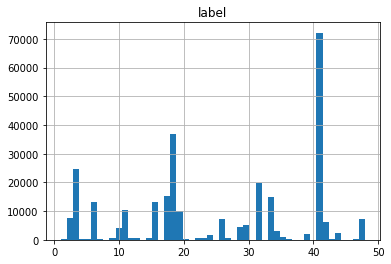

In [0]:
pd.DataFrame.hist(column='label', data=category_img_relabeled, bins=50)

In [0]:
landmarks = pd.read_table('Anno/list_landmarks.txt', header=1, sep='\s+')

In [0]:
landmarks.head()

,image_name,clothes_type,variation_type,landmark_visibility_1,landmark_location_x_1,landmark_location_y_1,landmark_visibility_2,landmark_location_x_2,landmark_location_y_2,landmark_visibility_3,landmark_location_x_3,landmark_location_y_3,landmark_visibility_4,landmark_location_x_4,landmark_location_y_4,landmark_visibility_5,landmark_location_x_5,landmark_location_y_5,landmark_visibility_6,landmark_location_x_6,landmark_location_y_6,landmark_visibility_7,landmark_location_x_7,landmark_location_y_7,landmark_visibility_8,landmark_location_x_8,landmark_location_y_8
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,1,0,146,102,0,173,95,0,94,242,0,205,255,0.0,136.0,229.0,0.0,177.0,232.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,1,0,107,67,0,122,67,0,79,78,0,140,91,0.0,106.0,150.0,0.0,134.0,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,1,0,101,79,0,116,76,0,78,81,0,141,84,0.0,87.0,188.0,0.0,118.0,185.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,1,0,96,74,0,113,72,0,67,171,0,148,171,0.0,100.0,148.0,0.0,120.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,1,1,102,106,0,116,102,0,63,194,1,146,216,0.0,105.0,245.0,0.0,137.0,246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
cols = landmarks.columns.to_list()[3:]

In [0]:
landmarks.drop(columns="landmark_location_y_8", inplace=True)
sc = {x: y for x,y in zip(landmarks.columns.to_list()[2:], cols)}
landmarks_n = landmarks.rename(columns=sc)

In [0]:
landmarks_n.to_pickle("/content/drive/My Drive/fashion/landmarks.pkl")

In [0]:
bbox = pd.read_table('Anno/list_bbox.txt', header=1, sep='\s+')
bbox.head()

,image_name,x_1,y_1,x_2,y_2
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,72,79,232,273
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,67,59,155,161
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,65,65,156,200
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,51,62,167,182
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,46,88,166,262


In [0]:
bbox.to_pickle("/content/drive/My Drive/fashion/bbox.pkl")

In [0]:
attr_img = pd.read_table('Anno/list_attr_img.txt', header=None, skiprows=2, sep='\s+', names=['img'] + list(range(1000)))

In [0]:
attr_img.head()

,img,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [0]:
def f(row):
    v = {'img': row.img}
    inds = row[1:].index[row[1:] == 1].to_list()
    for i in inds:
        if i in lookup_newindex_df.columns:
            m = lookup_newindex_df[i][~lookup_newindex_df[i].isna()]
            for ni, l_ in m.items():
                l = int(l_)
                if l in v and ni not in v[l]:
                    v[l].append(ni)
                else:
                    v[l] = [ni]

    return pd.Series(data=v)

In [0]:
data_df = attr_img.apply(f, axis=1)

In [0]:
data = data_df.merge(category_img_relabeled, right_on="name", left_on="img").drop(columns="name").rename(columns={"label": 5})

In [0]:
data.to_pickle("/content/drive/My Drive/data.pkl")